In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


In [2]:
data = pd.read_csv("Mall_Customers(2).csv")

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
a = data["Age"]
b = data["Spending Score (1-100)"]
x = np.stack((a, b), axis = -1)

In [5]:
x

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [6]:
KMeans2 = KMeans(n_clusters = 2, n_init = 10)
KMeans2.fit(x)

KMeans(n_clusters=2, n_init=10)

[[46.16521739 32.88695652]
 [28.95294118 73.62352941]]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


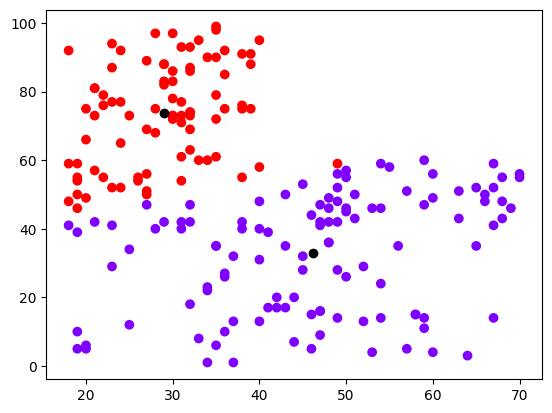

In [7]:

print(KMeans2.cluster_centers_)
print(KMeans2.labels_)
plt.scatter(x[:,0],x[:,1], c=KMeans2.labels_, cmap='rainbow')
plt.scatter(KMeans2.cluster_centers_[:,0] ,KMeans2.cluster_centers_[:,1], color='black')
# prediction example
print(KMeans2.predict(x))

In [11]:
cluster_labels = KMeans2.fit_predict(x)
silhouette_score(x, cluster_labels)



0.4692341232501655

In [12]:
KMeans3 = KMeans(n_clusters = 3, n_init = 10)
KMeans3.fit(x)

KMeans(n_clusters=3, n_init=10)

[[42.95744681 14.59574468]
 [29.56451613 80.74193548]
 [43.05494505 47.78021978]]
[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1 0 1 0 1 2 2 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1 0 1 0 1 2 2 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


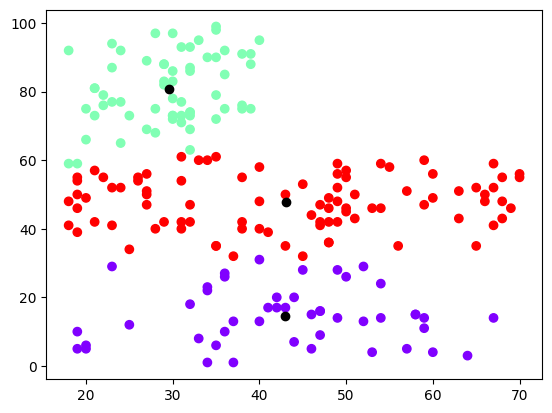

In [13]:
print(KMeans3.cluster_centers_)
print(KMeans3.labels_)
plt.scatter(x[:,0],x[:,1], c=KMeans3.labels_, cmap='rainbow')
plt.scatter(KMeans3.cluster_centers_[:,0] ,KMeans3.cluster_centers_[:,1], color='black')
print(KMeans3.predict(x))

In [14]:
cluster_labels = KMeans3.fit_predict(x)
silhouette_score(x, cluster_labels)



0.45300127016521263

In [15]:
KMeans4 = KMeans(n_clusters = 4, n_init = 10)
KMeans4.fit(x)

KMeans(n_clusters=4, n_init=10)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]
[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


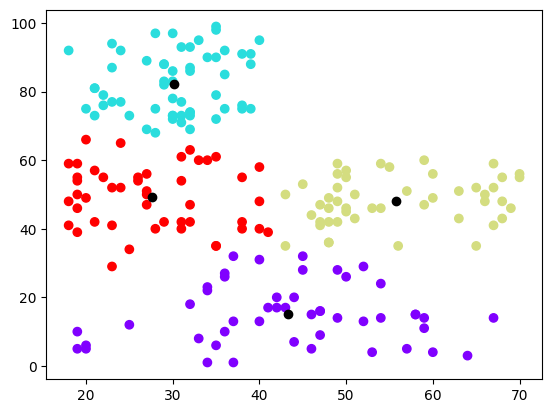

In [16]:
print(KMeans4.cluster_centers_)
print(KMeans4.labels_)
plt.scatter(x[:,0],x[:,1], c=KMeans4.labels_, cmap='rainbow')
plt.scatter(KMeans4.cluster_centers_[:,0] ,KMeans4.cluster_centers_[:,1], color='black')
print(KMeans4.predict(x))

In [17]:
#best cluster
cluster_labels = KMeans4.fit_predict(x)
silhouette_score(x, cluster_labels)



0.49973941540141753

In [18]:
KMeans5 = KMeans(n_clusters = 5, n_init = 10)
KMeans5.fit(x)

KMeans(n_clusters=5, n_init=10)

[[40.19354839 36.5483871 ]
 [30.1754386  82.35087719]
 [57.82051282 49.92307692]
 [43.28205128 11.84615385]
 [25.32352941 53.05882353]]
[4 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 4 0 1 0 1 3 1 3 1 0 4 0 1 3 1 3 1 3 1 3
 1 0 1 2 1 0 4 0 4 2 4 4 0 2 4 4 2 2 0 2 2 4 2 2 4 2 2 2 4 0 2 4 4 2 0 2 2
 2 4 2 0 4 0 2 4 2 0 4 2 2 4 4 2 2 4 2 0 0 4 2 4 0 4 4 2 2 4 2 4 2 2 2 2 2
 4 0 4 4 4 2 2 2 2 4 0 4 1 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1 3 1 0 4 3 1 3 1 3 1 3 1 3 1 0 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1]
[4 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 4 0 1 0 1 3 1 3 1 0 4 0 1 3 1 3 1 3 1 3
 1 0 1 2 1 0 4 0 4 2 4 4 0 2 4 4 2 2 0 2 2 4 2 2 4 2 2 2 4 0 2 4 4 2 0 2 2
 2 4 2 0 4 0 2 4 2 0 4 2 2 4 4 2 2 4 2 0 0 4 2 4 0 4 4 2 2 4 2 4 2 2 2 2 2
 4 0 4 4 4 2 2 2 2 4 0 4 1 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1 3 1 0 4 3 1 3 1 3 1 3 1 3 1 0 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1]


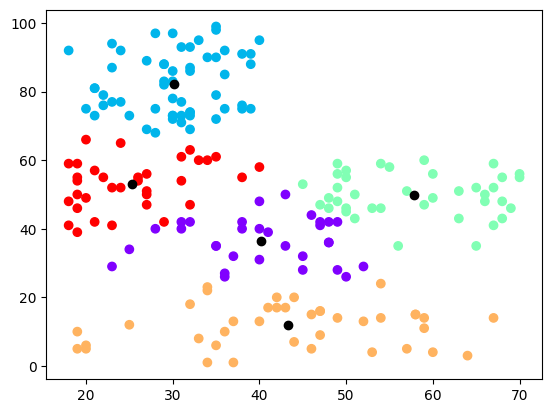

In [19]:
print(KMeans5.cluster_centers_)
print(KMeans5.labels_)
plt.scatter(x[:,0],x[:,1], c=KMeans5.labels_, cmap='rainbow')
plt.scatter(KMeans5.cluster_centers_[:,0] ,KMeans5.cluster_centers_[:,1], color='black')
print(KMeans5.predict(x))

In [20]:
cluster_labels = KMeans5.fit_predict(x)
silhouette_score(x, cluster_labels)



0.436202366601704

In [21]:
KMeans6 = KMeans(n_clusters = 6, n_init = 10)
KMeans6.fit(x)

KMeans(n_clusters=6, n_init=10)

[[30.1754386  82.35087719]
 [44.54545455 39.15151515]
 [29.2        11.26666667]
 [50.88461538 13.38461538]
 [60.36666667 51.16666667]
 [25.84615385 51.33333333]]
[5 0 2 0 5 0 2 0 3 0 3 0 3 0 2 0 1 5 1 0 1 0 3 0 3 0 1 5 1 0 3 0 3 0 3 0 3
 0 1 0 4 0 1 5 1 5 4 5 5 5 4 5 5 4 1 1 4 4 5 4 4 5 4 4 4 5 1 4 5 5 4 1 4 4
 4 5 1 1 5 1 4 5 4 1 5 1 4 5 5 1 4 5 1 1 5 5 1 5 1 5 5 1 4 5 4 5 4 4 4 4 4
 5 1 5 5 5 4 4 1 4 5 1 5 0 2 0 1 0 3 0 3 0 5 0 2 0 3 0 2 0 3 0 5 0 2 0 1 0
 2 0 3 0 3 0 3 0 2 0 2 0 1 0 2 0 3 0 3 0 1 5 3 0 2 0 3 0 3 0 3 0 1 0 3 0 1
 0 3 0 3 0 2 0 2 0 3 0 1 0 2 0]
[5 0 2 0 5 0 2 0 3 0 3 0 3 0 2 0 1 5 1 0 1 0 3 0 3 0 1 5 1 0 3 0 3 0 3 0 3
 0 1 0 4 0 1 5 1 5 4 5 5 5 4 5 5 4 1 1 4 4 5 4 4 5 4 4 4 5 1 4 5 5 4 1 4 4
 4 5 1 1 5 1 4 5 4 1 5 1 4 5 5 1 4 5 1 1 5 5 1 5 1 5 5 1 4 5 4 5 4 4 4 4 4
 5 1 5 5 5 4 4 1 4 5 1 5 0 2 0 1 0 3 0 3 0 5 0 2 0 3 0 2 0 3 0 5 0 2 0 1 0
 2 0 3 0 3 0 3 0 2 0 2 0 1 0 2 0 3 0 3 0 1 5 3 0 2 0 3 0 3 0 3 0 1 0 3 0 1
 0 3 0 3 0 2 0 2 0 3 0 1 0 2 0]


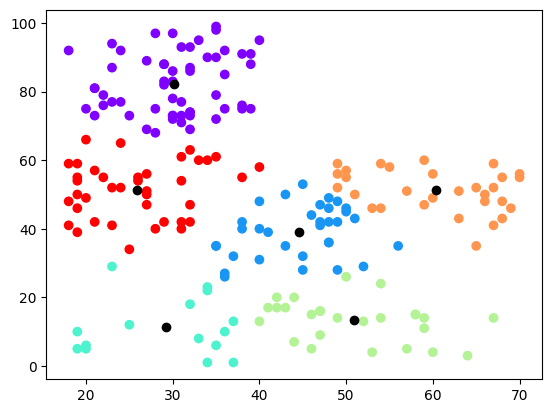

In [22]:
print(KMeans6.cluster_centers_)
print(KMeans6.labels_)
plt.scatter(x[:,0],x[:,1], c=KMeans6.labels_, cmap='rainbow')
plt.scatter(KMeans6.cluster_centers_[:,0] ,KMeans6.cluster_centers_[:,1], color='black')
print(KMeans6.predict(x))

In [23]:
cluster_labels = KMeans6.fit_predict(x)
silhouette_score(x, cluster_labels)



0.4405479018621985